# ОИАД. Лабораторная работа №4

Используйте набор данных **datasets/famcs_students.csv**

binary_cols = [ss, interest, weekend_study, bad_sleep, glasses, anime, study_form, literature]

Исползуйте целевую переменную $y=$ binary_cols[N % 8], где $N$ - номер в списке группы. Остальные переменные используйте в качестве признаков $X$ (предикторов). Вы можете отобрать наиболее информативные (по вашему экспертному мнению) признаки, но не менее 5.

Необходимо построить несколько моделей бинарной классификации $y$ по признакам $X$.

Разделите случайно исходные данные на 3 выборки:
* тренировочная (70%) - для определения параметров модели
* валидацонная (15%) - для подбора гиперпараметров модели
* тестовую (15%) - итоговая оценка качества

## 0. Тривиальный классификатор
Всегда выдает наиболее частый класс

## 1. Наивный байесовский классификатор
Алгоритм реализуйте сами!

## 2. Метод k-ближайших соседей
Алгоритм реализуйте сами!
Подберите оптимальный гиперпараметр $k$.

## 3. Логистическая регрессия
Алгоритм реализуйте сами!
Изобразите график зависимости метрик precision, recall от порога классификаци, а итоговый порог классификации выберите таким, при котором достигается максимум метрики f1. Используйте валидационную выборку.

## 4. Оценка качества
Для каждой построенной модели, по отложенной тестовой выборке оцените качество моделей:
* accuracy
* precision
* recall
* roc-auc
* постройте матрицу ошибок
  



In [11]:
N = 9
binary_cols = ['ss', 'interest', 'weekend_study', 'bad_sleep', 'glasses', 'anime', 'study_form', 'literature']
target_col = binary_cols[N % 8]
print(target_col)

interest


In [12]:
import numpy as np
import pandas as pd
#pd.describe_option()
full = pd.read_csv('famcs_students.csv')

print(full)

     cource  group                  stream sex   age   ss          interest  \
0         4     11  Прикладная информатика   М 20.00  Нет        Математика   
1         4     11  Прикладная информатика   Ж 20.00  Нет  Программирование   
2         4     11  Прикладная информатика   Ж 19.00  Нет  Программирование   
3         4     11  Прикладная информатика   Ж 20.00  Нет        Математика   
4         4     11  Прикладная информатика   М 20.00  Нет        Математика   
..      ...    ...                     ...  ..   ...  ...               ...   
122       4      1             Информатика   М 20.00  Нет  Программирование   
123       4      1             Информатика   Ж 22.00  Нет  Программирование   
124       4      1             Информатика   М 21.00  Нет        Математика   
125       4      1             Информатика   М 20.00  Нет  Программирование   
126       4      1             Информатика   М 20.00  Нет  Программирование   

          os weekend_study bad_sleep  ...      soci

In [3]:
def get_categorical_columns(df):
    return df.select_dtypes(include=['object', 'category']).columns.tolist()

print(get_categorical_columns(full))

['stream', 'sex', 'ss', 'interest', 'os', 'weekend_study', 'bad_sleep', 'glasses', 'work_experience', 'ai', 'anime', 'social', 'sport', 'study_form', 'eye_color', 'retake', 'hostel', 'literature']


In [4]:
def one_hot_encode(df, cat_cols = None, drop_first = True):
    if cat_cols is None:
        cat_cols = get_categorical_columns(df)
    df2 = df.copy()
    df2 = pd.get_dummies(df2, columns=cat_cols, drop_first=drop_first,  dtype=int)
    return df2

def label_encode(df, cat_cols = None):
    if cat_cols is None:
        cat_cols = get_categorical_columns(df)
    df2 = df.copy()
    mappings = {}
    for col in cat_cols:
        df2[col] = df2[col].astype('category')
        mapping = {cat: code for code, cat in enumerate(df2[col].cat.categories)}
        df2[col] = df2[col].cat.codes
        mappings[col] = mapping
    return df2, mappings

#full_encoded, mappings = label_encode(full)
#print(mappings)
full_encoded = one_hot_encode(full)
print(full_encoded)

     cource  group   age  height  miss  foot_size  score  \
0         4     11  20.0   192.0   3.0       48.0   9.20   
1         4     11  20.0   169.0   5.0       39.0   8.80   
2         4     11  19.0   190.0  10.0       41.0   8.80   
3         4     11  20.0   158.0   3.0       36.0   8.80   
4         4     11  20.0   187.0   1.0       46.0   9.00   
..      ...    ...   ...     ...   ...        ...    ...   
122       4      1  20.0   185.0   1.0       45.0   6.29   
123       4      1  22.0   169.0   0.0       39.0   6.00   
124       4      1  21.0   183.0  10.0       44.0   7.00   
125       4      1  20.0   187.0   1.0       45.0   7.00   
126       4      1  20.0   186.0  10.0       43.0   6.00   

     stream_Прикладная информатика  stream_Прикладная математика  sex_М  ...  \
0                                1                             0      1  ...   
1                                1                             0      0  ...   
2                                1     

In [5]:
def compute_correlations(df, method = 'pearson'):
    #method{‘pearson’, ‘kendall’, ‘spearman’} or callable
    num_df = df.select_dtypes(include=[np.number])
    corr = num_df.corr(method=method)
    return corr

#===============================================
pd.options.display.float_format = '{:.2f}'.format
#===============================================

print("Pearson")
pearson = compute_correlations(full_encoded)
print(pearson)
#print("Kendall")
#print(compute_correlations(full_encoded, 'kendall'))
#print("Spearman")
#print(compute_correlations(full_encoded, 'spearman'))


Pearson
                                 cource  group   age  height  miss  foot_size  \
cource                             1.00  -0.09  0.15   -0.01  0.04      -0.06   
group                             -0.09   1.00 -0.04    0.05 -0.06      -0.01   
age                                0.15  -0.04  1.00   -0.26  0.18      -0.09   
height                            -0.01   0.05 -0.26    1.00 -0.03       0.84   
miss                               0.04  -0.06  0.18   -0.03  1.00       0.07   
foot_size                         -0.06  -0.01 -0.09    0.84  0.07       1.00   
score                              0.07   0.20 -0.28    0.23 -0.52       0.05   
stream_Прикладная информатика      0.17   0.94 -0.02    0.03 -0.05      -0.03   
stream_Прикладная математика      -1.00   0.09 -0.15    0.01 -0.04       0.06   
sex_М                             -0.08  -0.08  0.00    0.54  0.19       0.76   
ss_Нет                             0.04   0.04  0.13    0.04  0.05       0.14   
interest_Программиро

In [7]:
import numpy as np
import pandas as pd

def find_high_correlations(corr_matrix, threshold=0.8, absolute=True):
    corr_pairs = []
    cols = corr_matrix.columns

    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            val = corr_matrix.iloc[i, j]
            if absolute:
                val = abs(val)
            if val > threshold:
                corr_pairs.append((cols[i], cols[j], corr_matrix.iloc[i, j]))

    return pd.DataFrame(corr_pairs, columns=["feature_1", "feature_2", "correlation"])


def find_high_correlations_target(corr_matrix, target_col, threshold=0.5):
    if target_col not in corr_matrix.columns:
        raise ValueError(f"Колонка '{target_col}' не найдена в матрице корреляции.")
    correlations = corr_matrix[target_col].drop(target_col)
    strong_corrs = correlations[correlations.abs() > threshold]
    strong_corrs = strong_corrs.reindex(strong_corrs.abs().sort_values(ascending=False).index)
    return strong_corrs

#print(find_high_correlations(pearson, 0.5))
#for col in binary_cols:
#    print(find_high_correlations_target(pearson, col, threshold=0.0))
#strong_corrs = find_high_correlations_target(pearson, 'interest', threshold=0.0)
#print(strong_corrs)


In [8]:
import numpy as np
import pandas as pd

def find_strong_correlations_ohe(corr_matrix, target_prefix, threshold=0.5):
    target_cols = [c for c in corr_matrix.columns if c.startswith(target_prefix)]
    if not target_cols:
        raise ValueError(f"Не найдены колонки, начинающиеся с '{target_prefix}'")

    results = []
    for target in target_cols:
        correlations = corr_matrix[target].drop(target, errors='ignore')
        strong_corrs = correlations[correlations.abs() > threshold]
        for feat, corr_val in strong_corrs.items():
            results.append({'target_col': target, 'feature': feat, 'correlation': corr_val})
    
    result_df = pd.DataFrame(results)
    if not result_df.empty:
        result_df = result_df.sort_values(by='correlation', key=np.abs, ascending=False)
    return result_df
    
strong_corrs = find_strong_correlations_ohe(pearson, target_prefix='interest_', threshold=0.0)
print(strong_corrs)


                   target_col                          feature  correlation
3   interest_Программирование                           height         0.25
29  interest_Программирование                  ai_gpt oss 120b        -0.18
41  interest_Программирование                        retake_2+        -0.14
31  interest_Программирование                        anime_Нет        -0.13
35  interest_Программирование  sport_Редко, легкая физкультура         0.12
6   interest_Программирование                            score        -0.12
17  interest_Программирование       work_experience_Не работаю        -0.12
5   interest_Программирование                        foot_size         0.12
34  interest_Программирование            sport_Да, я спортсмен        -0.11
38  interest_Программирование                  eye_color_Карие        -0.11
2   interest_Программирование                              age        -0.11
36  interest_Программирование               study_form_Платная         0.10
37  interest

# Разделите случайно исходные данные на 3 выборки:

тренировочная (70%) - для определения параметров модели

валидацонная (15%) - для подбора гиперпараметров модели

тестовую (15%) - итоговая оценка качества

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = full.drop(columns=[target_col])
y = full[target_col]
X = pd.get_dummies(X)
if y.dtype == "object":
    y = LabelEncoder().fit_transform(y)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=123, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=321, stratify=y_temp)
X_train = X_train.astype(float)
X_val = X_val.astype(float)
X_test = X_test.astype(float)

print(f"Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")



Train: 88, Val: 19, Test: 20
float64    62
Name: count, dtype: int64


# 0. Тривиальный классификатор¶
Всегда выдает наиболее частый класс

In [32]:
class TrivialClassifier:
    def fit(self, y):
        values, counts = np.unique(y, return_counts=True)
        self.most_common = values[np.argmax(counts)]

    def predict(self, X):
        return np.full(len(X), self.most_common)


In [33]:
from sklearn.metrics import accuracy_score
trivial = TrivialClassifier()
trivial.fit(y_train)
y_pred_trivial = trivial.predict(X_test)
print("Trivial accuracy:", accuracy_score(y_test, y_pred_trivial))

Trivial accuracy: 0.8


# В принципе очень даже неплохо угадывает

## 1. Наивный байесовский классификатор
Алгоритм реализуйте сами!

Инфа с https://habr.com/ru/articles/802435

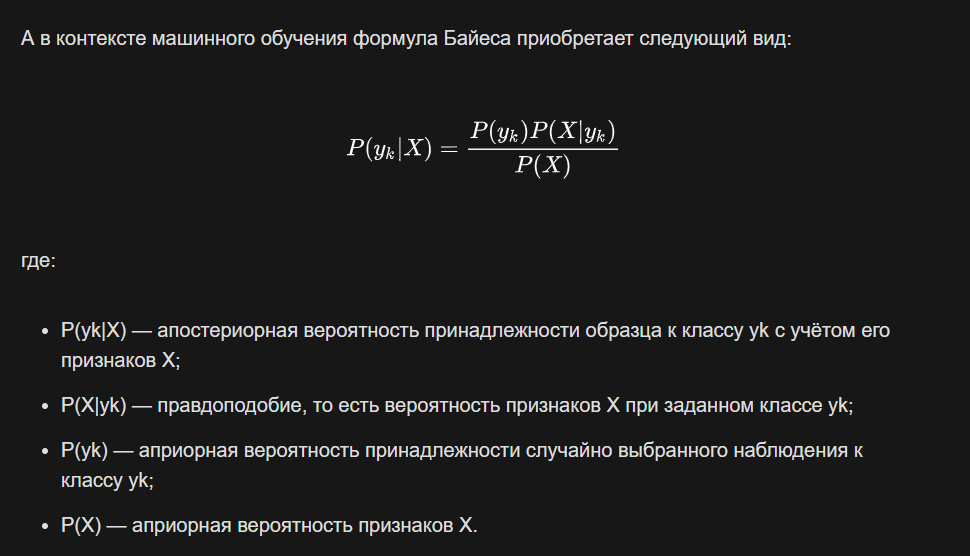

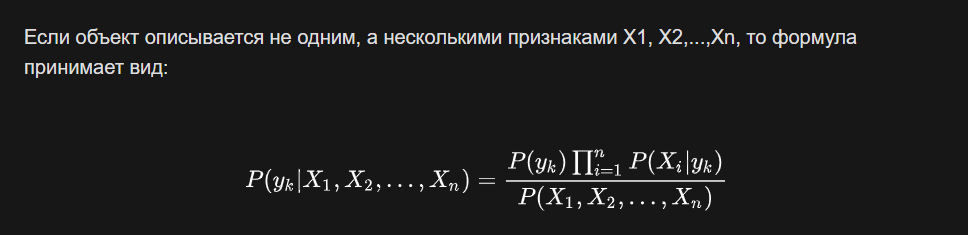

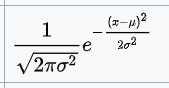

В предикте для каждого класса c:
1. Приоритет
$logP(y=c)$
2. Likelihood (условная вероятность признаков)
$P(x \mid y=c) = \prod_{j=1}^{n} P(x_j \mid y=c)$
3. Складывает приоритет + likelihood

Потом выбирает класс с максимальной апостериорной вероятностью

In [34]:
class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.priors = {c: np.mean(y == c) for c in self.classes} #доля классов в  распределении
        self.mean = {c: X[y == c].mean(axis=0) for c in self.classes}
        self.var = {c: X[y == c].var(axis=0) + 1e-6 for c in self.classes}  

    #probability distribution function
    def _pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(pd.to_numeric(- (x - mean) ** 2 / (2 * var)))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def _predict_single(self, x):
        posteriors = []
        for c in self.classes:
            prior = np.log(self.priors[c])
            likelihood = np.sum(np.log(self._pdf(c, x)))
            posteriors.append(prior + likelihood)
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        return np.array([self._predict_single(x) for x in X.values])
#===============================

np.seterr(divide = 'ignore') 
#===============================
nb = NaiveBayes()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes accuracy: 0.5


# Не очень результат

## 2. Метод k-ближайших соседей
Алгоритм реализуйте сами!
Подберите оптимальный гиперпараметр $k$.

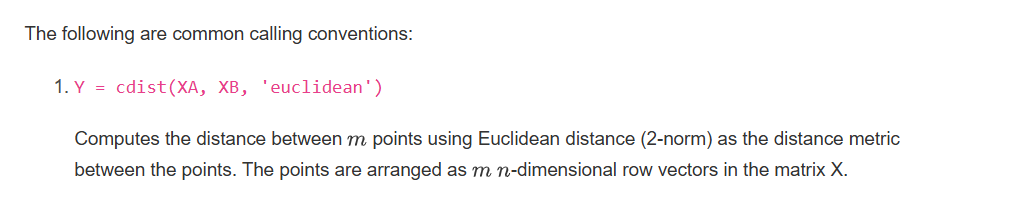
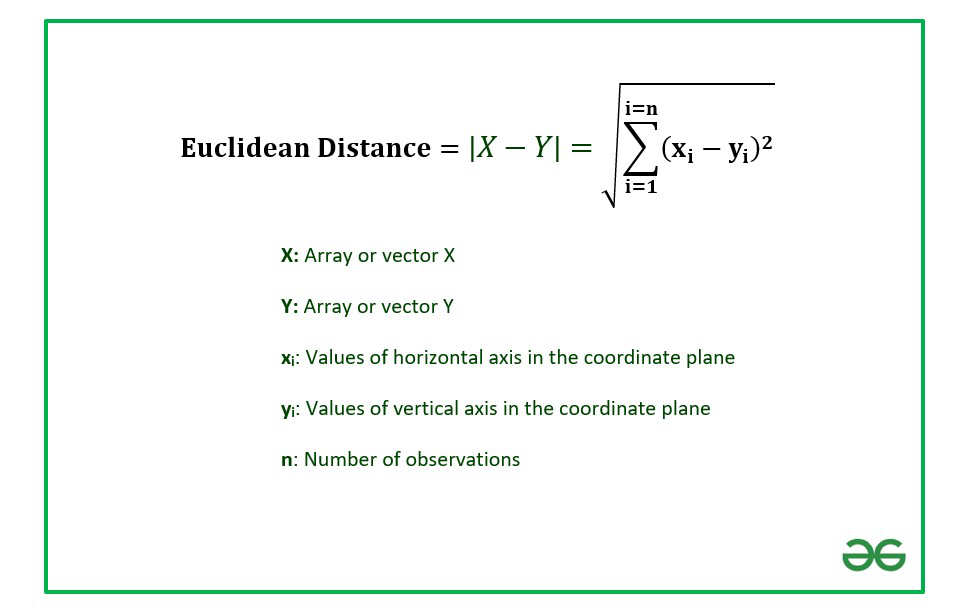

kNN:
# При предсказании объекта  мы:

1. Ищем k ближайших соседей из обучающей выборки
2. Берём их классы
3. Выбираем класс большинства


# Для поиска оптимального k мы пробегаемся через все k и смотрим accuracy на валидационном сете

In [54]:
from scipy.spatial.distance import cdist

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X.values
        self.y_train = y

    def predict(self, X):
        distances = cdist(X.values, self.X_train, metric='euclidean')
        neighbors_idx = np.argsort(distances, axis=1)[:, :self.k]
        neighbors_labels = self.y_train[neighbors_idx]
        y_pred = [np.bincount(row).argmax() for row in neighbors_labels]
        return np.array(y_pred)

best_k = None
best_acc = 0
for k in range(1, 21):
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    if acc > best_acc:
        best_acc = acc
        best_k = k


print(f"Best k = {best_k} (val accuracy = {best_acc:.3f})")

knn_best = KNN(k=best_k)
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_test)
print("KNN test accuracy:", accuracy_score(y_test, y_pred_knn))

Best k = 10 (val accuracy = 0.895)
KNN test accuracy: 0.8



## 3. Логистическая регрессия
Алгоритм реализуйте сами!
Изобразите график зависимости метрик precision, recall от порога классификаци, а итоговый порог классификации выберите таким, при котором достигается максимум метрики f1. Используйте валидационную выборку.


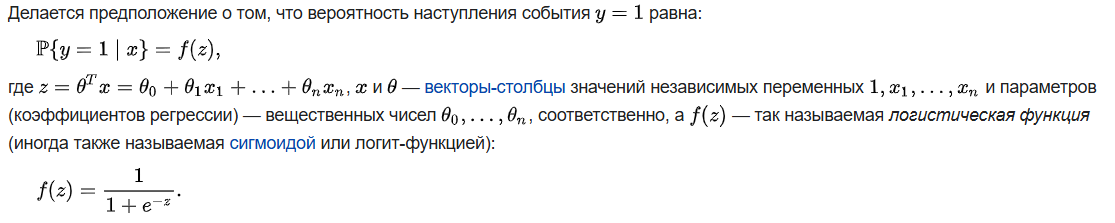

# Минимизируем функцию кроссэнтропии:

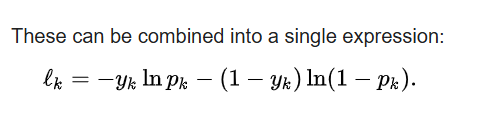

In [116]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, n_iter=5000):
        self.lr = lr
        self.n_iter = n_iter

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]  # bias
        self.weights = np.zeros(X.shape[1])

        for _ in range(self.n_iter):
            z = X @ self.weights
            preds = self.sigmoid(z)
            gradient = X.T @ (preds - y) / len(y)
            self.weights -= self.lr * gradient

    def predict_proba(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return self.sigmoid(X @ self.weights)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)


logreg = LogisticRegressionScratch(lr=0.0005, n_iter=6000)
logreg.fit(X_train.values, y_train)
y_pred_logreg= logreg.predict(X_test)
print("logreg test accuracy:", accuracy_score(y_test, y_pred_logreg))
val_proba = logreg.predict_proba(X_val.values)


logreg test accuracy: 0.85


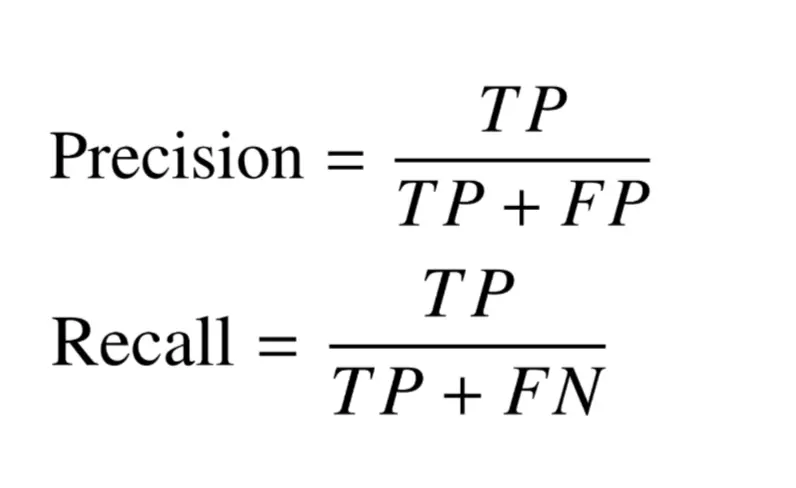

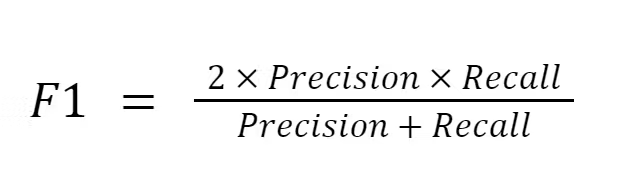

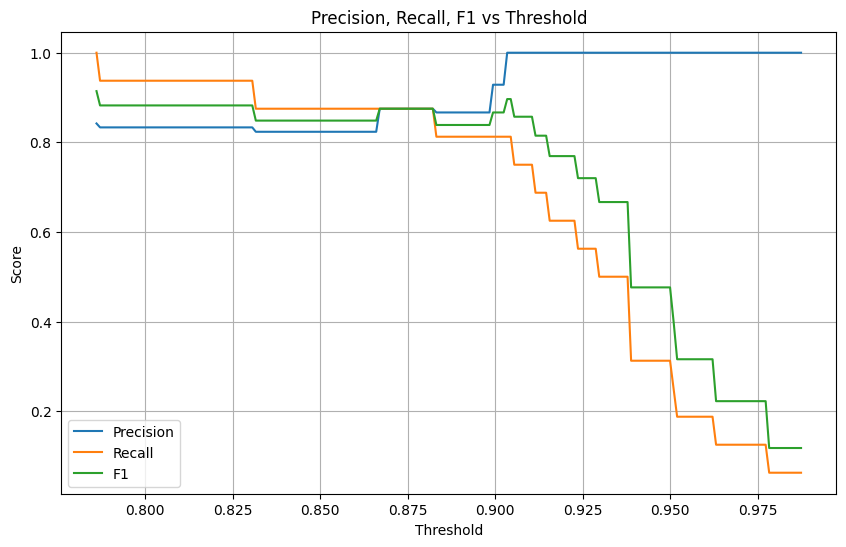

In [117]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

thresholds = np.linspace(min(val_proba),max(val_proba), 200)

precisions = []
recalls = []
f1_scores = []

for t in thresholds:
    preds = (val_proba >= t).astype(int)
    precisions.append(precision_score(y_val, preds))
    recalls.append(recall_score(y_val, preds))
    f1_scores.append(f1_score(y_val, preds))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1_scores, label="F1")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, F1 vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


In [118]:
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"Best threshold = {best_threshold:.3f}, F1 = {f1_scores[best_idx]:.3f}")

y_pred_logreg= logreg.predict(X_test, best_threshold)

Best threshold = 0.786, F1 = 0.914


## 4. Оценка качества
Для каждой построенной модели, по отложенной тестовой выборке оцените качество моделей:
* accuracy
* precision
* recall
* roc-auc
* постройте матрицу ошибок

In [119]:
def evaluate_model(name, y_true, y_pred, y_proba=None):
    print("======================================================")
    print(f"========================{name}=======================")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    if y_proba is not None:
        print("ROC-AUC:", roc_auc_score(y_true, y_proba))

    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    print("\nConfusion Matrix:")
    print("+------------------+----------------+----------------+")
    print("|                  | Predicted Math | Predicted Prog |")
    print("+------------------+----------------+----------------+")
    print(f"| Actual Math      | {tn:6d} (TN)    | {fp:6d} (FP)    |")
    print(f"| Actual Prog      | {fn:6d} (FN)    | {tp:6d} (TP)    |")
    print("+------------------+----------------+----------------+")
    print("======================================================")

In [120]:
evaluate_model("Trivial",
               y_test,
               y_pred_trivial)

========================Trivial=======================
Accuracy: 0.8
Precision: 0.8
Recall: 1.0

Confusion Matrix:
+------------------+----------------+----------------+
|                  | Predicted Math | Predicted Prog |
+------------------+----------------+----------------+
| Actual Math      |      0 (TN)    |      4 (FP)    |
| Actual Prog      |      0 (FN)    |     16 (TP)    |
+------------------+----------------+----------------+


In [121]:
evaluate_model("Naive Bayes",
               y_test,
               y_pred_nb)


========================Naive Bayes=======================
Accuracy: 0.5
Precision: 0.875
Recall: 0.4375

Confusion Matrix:
+------------------+----------------+----------------+
|                  | Predicted Math | Predicted Prog |
+------------------+----------------+----------------+
| Actual Math      |      3 (TN)    |      1 (FP)    |
| Actual Prog      |      9 (FN)    |      7 (TP)    |
+------------------+----------------+----------------+


In [122]:
evaluate_model("kNN",
               y_test,
               y_pred_knn)

========================kNN=======================
Accuracy: 0.8
Precision: 0.8
Recall: 1.0

Confusion Matrix:
+------------------+----------------+----------------+
|                  | Predicted Math | Predicted Prog |
+------------------+----------------+----------------+
| Actual Math      |      0 (TN)    |      4 (FP)    |
| Actual Prog      |      0 (FN)    |     16 (TP)    |
+------------------+----------------+----------------+


In [123]:
test_proba = logreg.predict_proba(X_test.values)
evaluate_model("Logistic Regression",
               y_test,
               y_pred_logreg,
               y_proba=test_proba)

========================Logistic Regression=======================
Accuracy: 0.85
Precision: 0.8421052631578947
Recall: 1.0
ROC-AUC: 0.71875

Confusion Matrix:
+------------------+----------------+----------------+
|                  | Predicted Math | Predicted Prog |
+------------------+----------------+----------------+
| Actual Math      |      1 (TN)    |      3 (FP)    |
| Actual Prog      |      0 (FN)    |     16 (TP)    |
+------------------+----------------+----------------+
